In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

In [2]:
from bandit import GreedyEpsAgent, ConstantStepSizeGreedyEpsAgent, UCBAgent, GradientBanditAgent

# Test Action Values

In [3]:
# Test the action values
k = 10
t = 10000
bandit = GreedyEpsAgent(k=k)
reward_matrix = bandit.test_action_values(t)

Text(0, 0.5, 'Reward')

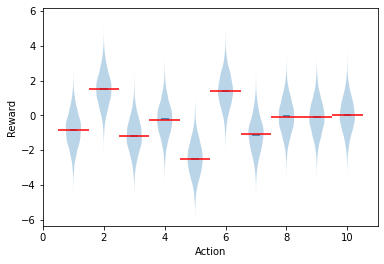

In [4]:
plt.violinplot(reward_matrix, showmeans=True, showextrema=False)
plt.hlines(bandit.action_values, np.arange(k) + 0.5, np.arange(k) + 1.5, colors="r")
plt.xlabel("Action")
plt.ylabel("Reward")

# Parametric Study settings

In [5]:
# Define the run steps (how many steps per run) and the number of independent runs (for averaging purposes)
run_steps = 1000
n_runs = 2000

## Greedy-Epsilon

In [6]:
# Define parameter grid and bandits
param_grid = np.arange(-7,-1, dtype=float)
bandits = [GreedyEpsAgent(k=k, eps=2**p) for p in param_grid]


In [7]:
# Initialize reward variable
greedy_eps_avg_reward = np.zeros(shape=(len(param_grid), 2))
greedy_eps_avg_reward[:, 0] = param_grid

# Perform training
for i, bandit in enumerate(bandits):
    for run in tqdm(range(n_runs)):
        bandit.reset()
        _, rewards, _ = bandit.train(run_steps)
        greedy_eps_avg_reward[i, 1] += (1/n_runs)*rewards.mean()

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

## Optimistic Greedy

In [8]:
# Define parameter grid and bandits
param_grid = np.arange(-2, 3, dtype=float)
bandits = [ConstantStepSizeGreedyEpsAgent(k=k, eps=0, alpha=0.1, init_action_val=2**p) for p in param_grid]

In [9]:
# Initialize reward variable
opt_greedy_avg_reward = np.zeros(shape=(len(param_grid), 2))
opt_greedy_avg_reward[:, 0] = param_grid

# Perform training
for i, bandit in enumerate(bandits):
    for run in tqdm(range(n_runs)):
        bandit.reset()
        _, rewards, _ = bandit.train(run_steps)
        opt_greedy_avg_reward[i, 1] += (1/n_runs)*rewards.mean()

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

## UCB

In [10]:
# Define parameter grid and bandits
param_grid = np.arange(-4, 3, dtype=float)
bandits = [UCBAgent(k=k, c=2**p) for p in param_grid]

In [11]:
# Initialize reward variable
ucb_avg_reward = np.zeros(shape=(len(param_grid), 2))
ucb_avg_reward[:, 0] = param_grid

# Perform training
for i, bandit in enumerate(bandits):
    for run in tqdm(range(n_runs)):
        bandit.reset()
        _, rewards, _ = bandit.train(run_steps)
        ucb_avg_reward[i, 1] += (1/n_runs)*rewards.mean()

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

## Gradient Bandit

In [12]:
# Define parameter grid and bandits
param_grid = np.arange(-5, 3, dtype=float)
bandits = [GradientBanditAgent(k=k, alpha=2**p) for p in param_grid]

In [13]:
# Initialize reward variable
gba_reward = np.zeros(shape=(len(param_grid), 2))
gba_reward[:, 0] = param_grid

# Perform training
for i, bandit in enumerate(bandits):
    for run in tqdm(range(n_runs)):
        bandit.reset()
        _, rewards, _ = bandit.train(run_steps)
        gba_reward[i, 1] += (1/n_runs)*rewards.mean()

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

# Plotting

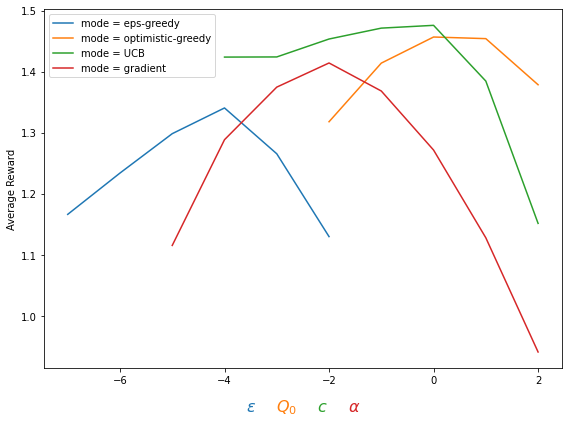

In [14]:
import matplotlib
matplotlib.rcParams["text.usetex"]
from utils import multicolor_label

mode_list = ['eps-greedy', 'optimistic-greedy', 'UCB', 'gradient']
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=False, figsize=(8,6));


plot_labels = [f'mode = {mode}' for mode in mode_list]
axs.plot(greedy_eps_avg_reward[:,0], greedy_eps_avg_reward[:, 1])
axs.plot(opt_greedy_avg_reward[:,0], opt_greedy_avg_reward[:, 1])
axs.plot(ucb_avg_reward[:, 0], ucb_avg_reward[:, 1])
axs.plot(gba_reward[:, 0], gba_reward[:, 1])

multicolor_label(axs,[r'$\epsilon$', r'$Q_0$',r'$c$',r'$\alpha$'],[x.get_color() for x in axs.lines], axis='x', size=16)
axs.set_ylabel('Average Reward')
axs.legend(labels=plot_labels,)



plt.tight_layout()